In [1]:
import pandas as pd
data = pd.read_csv('processed_data.csv')

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [2]:
from sklearn.model_selection import train_test_split

# Select features and target
features = ['Facility Age', 'Fencing Available Numeric', 'Lighting Available Numeric']
target = 'Facility Condition Numeric'

# Drop rows with missing values in features or target
data_cleaned = data.dropna(subset=features + [target])

X = data_cleaned[features]
y = data_cleaned[target]

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set shape: {X_train.shape}, Test set shape: {X_test.shape}")

Training set shape: (5391, 3), Test set shape: (1348, 3)


In [3]:
from sklearn.tree import DecisionTreeClassifier

# Initialize and train the Decision Tree Classifier
decision_tree = DecisionTreeClassifier(random_state=42, max_depth=3)
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [4]:
from sklearn.metrics import classification_report, accuracy_score

# Predict on the test set
y_pred = decision_tree.predict(X_test)

# Display evaluation metrics
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         3
         1.0       0.00      0.00      0.00        28
         2.0       0.00      0.00      0.00        27
         3.0       0.00      0.00      0.00       165
         4.0       0.83      1.00      0.91      1125

    accuracy                           0.83      1348
   macro avg       0.17      0.20      0.18      1348
weighted avg       0.70      0.83      0.76      1348

Accuracy Score: 0.8345697329376854


/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


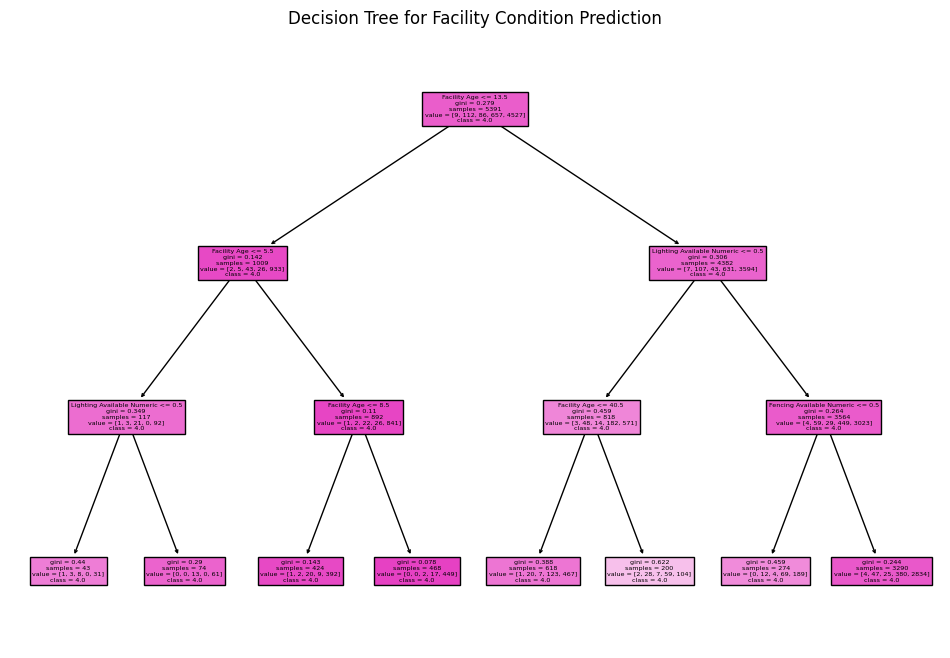

In [5]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Visualize the decision tree
plt.figure(figsize=(12, 8))
plot_tree(
    decision_tree, 
    feature_names=features, 
    class_names=[f"{cls:.1f}" for cls in sorted(y.unique())],
    filled=True
)
plt.title("Decision Tree for Facility Condition Prediction")
plt.show()